In [2]:
import numpy as np
import math

# FUNCIONES
import nbimporter
import G360_Function as func
# import fff as func

In [2]:
class FReaction(np.ndarray):
    def __new__(cls, f_v, f_x=None, f_y=None):
        if isinstance(f_v, list) and len(f_v) == 3:
            obj = np.array(f_v, dtype=float).view(cls)
        else:
            obj = np.array([f_v, f_x, f_y], dtype=float).view(cls)
        return obj

    # def __init__(self, f_v, f_x = None, f_y = None):
    #     if isinstance (f_v, list) and len(f_v) == 3:
    #         self._lista_array = np.array(f_v)
    #     else:        
    #         self._lista_array = np.array([f_v, f_x, f_y])

    def __str__(self):
        return repr(self)

    @property
    def F_vert(self):
        return self[0]

    @property
    def F_x_long(self):
        return self[1]

    @property
    def F_y_transv(self):
        return self[2]

    # Sobrescribimos __getattr__ para ocultar los atributos de numpy
    # def __getattr__(self, name):
    #     if name in ['F_vert', 'F_long', 'F_transv']:
    #         return super().__getattr__(name)
    #     raise AttributeError(f"'{type(self).__name__}' object has no attribute '{name}'")

    # # Sobrescribimos dir() para mostrar solo las propiedades que definimos
    # def __dir__(self):
    #     # Solo mostrar las propiedades definidas por nosotros, no las de numpy
    #     return ['F_vert', 'F_long', 'F_transv']

In [3]:
# eg REACCIONES
FC = FReaction(-2,1,1)
FT = FReaction(2,1,1)
Fl = FReaction(1,2,1)
Ft = FReaction(1,1,2)
F_R = np.array([FC, FT, Fl, Ft])


In [4]:
# eg INPUTS PRELIMINARES
input_Cohesion = 30
input_Sigma_adm = 150
input_Gamma_suelo = 16.5
input_Phi = math.radians(30)

#inputs opcionales
inputOP_Betha = input_Phi *2/3
inputOP_Gamma_concr = 24
inputOP_Gamma_suelo_rell = input_Gamma_suelo
inputOP_fy = 420
inputOP_fprimac = 21

### ZAPATA AISLADA

In [ ]:
# 0 -> Cuadrado   1 -> Circular
GeometriaPedestal = 0 

class CimentacionZapata(): #PARA LA CUÑA, HACE FALTA ANG \ALPHA Y DIMENSIÓN DE LA CUÑA
    def __init__(self, AP_AlturaPedestal, P_Profundidad, A_Ancho, EP_EspesorPedestal, E_EspesorZap):
        self._AP_AlturaPedestal = AP_AlturaPedestal
        self._P_Profundidad = P_Profundidad
        self._A_Ancho = A_Ancho
        self._EP_EspesorPedestal = EP_EspesorPedestal
        self._E_EspesorZap = E_EspesorZap
        
####
# GEOMETRÍA Y CANTIDADES
    def volumen_concr(self):
        self._secc_ped = self._EP_EspesorPedestal**2 if GeometriaPedestal == 0 else math.pi * (self._EP_EspesorPedestal/2)**2
        self._volumen_concr = self._A_Ancho**2 * self._E_EspesorZap + self._secc_ped * (self._AP_AlturaPedestal + self._P_Profundidad - self._E_EspesorZap)
        return self._volumen_concr

    def volumen_excavacion(self):
        self._volumen_excavacion = self._A_Ancho**2 * self._P_Profundidad
        return self._volumen_excavacion

    def volumen_relleno(self):
        self._volumen_relleno = self.volumen_excavacion() - (self.volumen_concr() - self._secc_ped * self._AP_AlturaPedestal)
        return self._volumen_relleno

    def volumen_cono(self):
        self._R0_cono = self._P_Profundidad * math.tan(inputOP_Betha)
        self._volumen_cono = func.troncopiramidal(self._A_Ancho**2, (self._A_Ancho + 2 * self._R0_cono)**2, self._P_Profundidad) - self.volumen_excavacion()
        return self._volumen_cono

In [104]:
Z1 = CimentacionZapata(1,2,2,0.5,0.4)

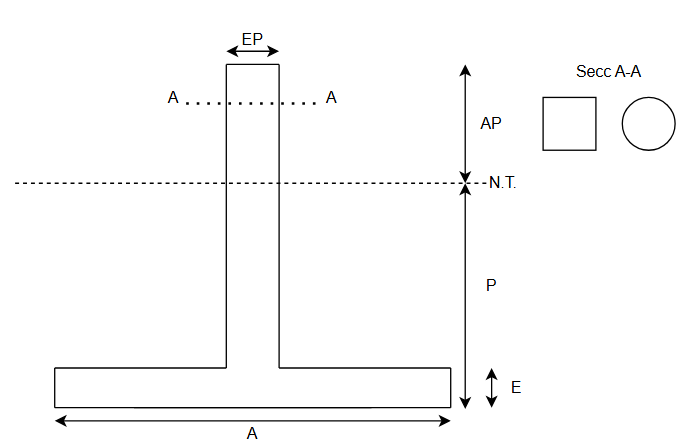

### ZAPATA CUÑA

In [8]:
class CimentacionCunha(): #PARA LA CUÑA, HACE FALTA ANG \ALPHA Y DIMENSIÓN DE LA CUÑA
    def __init__(self, AP_AlturaPedestal, P_Profundidad, A_Ancho, EP_EspesorPedestal, E_EspesorZap, Hy_DesnivelIncl, Hx_DesnivelIncl = None, Alpha_AngIncl = None):
        self._AP_AlturaPedestal = AP_AlturaPedestal
        self._P_Profundidad = P_Profundidad
        self._A_Ancho = A_Ancho
        self._EP_EspesorPedestal = EP_EspesorPedestal
        self._E_EspesorZap = E_EspesorZap
        self._Hy_DesnivelIncl = Hy_DesnivelIncl
        
        # OPCIONALES
        self._Alpha_AngIncl = math.radians(60) if Alpha_AngIncl == None else math.radians(Alpha_AngIncl) #rads
        if Hx_DesnivelIncl == None:
            self._Hx_DesnivelIncl = func.mround_down( self._Hy_DesnivelIncl/math.tan(self._Alpha_AngIncl) , 5/100) - 5/100 #Redondear hacia abajo en multiplos de 5 cm
        


    
####
# GEOMETRÍA Y CANTIDADES
    def volumen_concr(self):


    def volumen_excavacion(self):


    def volumen_relleno(self):


    def volumen_cono(self):


In [67]:
class ChequeosCol:
    def __init__():

array([-2.,  1.,  1.])

In [ ]:
#################

4.414213562373095

In [42]:
# !pip install nbimporter
!pip show nbimporter

Name: nbimporter
Version: 0.3.4
Summary: Import IPython notebooks as modules
Home-page: https://github.com/grst/nbimporter
Author: Gregor Sturm
Author-email: mail@gregor-sturm.de
License: BSD 3-clause
Location: /home/f47934b4-a8d3-46f1-92a2-2253cc72f02e/.local/lib/python3.11/site-packages
Requires: 
Required-by: 


In [3]:
np.

NameError: name 'troncopiramidal' is not defined

In [23]:
math.tan(math.radians(45))

0.9999999999999999

In [20]:
math.degrees(1)

57.29577951308232

In [22]:
180/math.pi

57.29577951308232

In [7]:
func.round_down(3.657, 3)

3.656